In [1]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#calculate RMSF and provide .dat file to plot
def calculate_rmsf(trajectory_path, topology_path, start_residue, end_residue, output_file):
    
    trajectory = md.load(trajectory_path, top=topology_path)
    
    selection_string = f"resid {start_residue-1} to {end_residue-1} and name CA"
    ca_indices = trajectory.topology.select(selection_string)
    
    ca_traj = trajectory.atom_slice(ca_indices)
    
    ca_traj.superpose(ca_traj, frame=0)
    
    # Calculate RMSF
    rmsf_nm = md.rmsf(ca_traj, reference=ca_traj[0])  
    rmsf_angstrom = rmsf_nm * 10  

    residue_indices = list(range(1, len(rmsf_angstrom) + 1))
    
    # Save RMSF to a .dat file
    with open(output_file, 'w') as f:
        f.write("# ResidueIndex RMSF(Å)\n")
        for res_index, rmsf in zip(residue_indices, rmsf_angstrom):
            f.write(f"{res_index} {rmsf:.4f}\n")
    
    return residue_indices, rmsf_angstrom

# Define paths
trajectory_1_path = "/media/rutika/My_Book/hpc/arrow/h2a_3lz0/dry_t_fit.xtc"
topology_1_path = "/media/rutika/My_Book/hpc/arrow/h2a_3lz0/dry_h2a_3lz0.prmtop"
start_residue_1 = 291
end_residue_1 = 425

trajectory_2_path = "/media/rutika/My_Book/hpc/arrow/h2z_3lz0/dry_t_fit_final.xtc"
topology_2_path = "/media/rutika/My_Book/hpc/arrow/h2z_3lz0/dry_h2z_parmed.prmtop"
start_residue_2 = 1
end_residue_2 = 135

# Calculate RMSF 
residue_indices_1, rmsf_1 = calculate_rmsf(
    trajectory_1_path, topology_1_path, start_residue_1, end_residue_1, "rmsf1.dat"
)

residue_indices_2, rmsf_2 = calculate_rmsf(
    trajectory_2_path, topology_2_path, start_residue_2, end_residue_2, "rmsf2.dat"
)

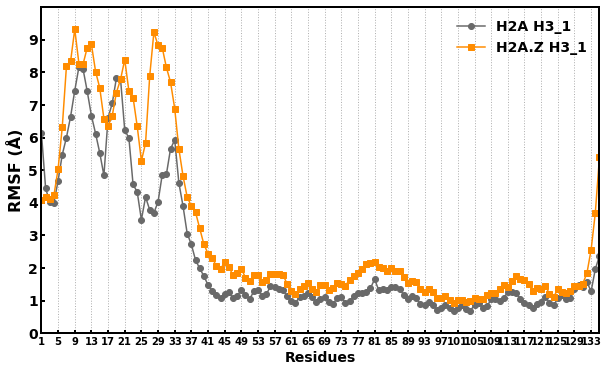

In [8]:

# read data from a .dat file
def read_dat_file(file_path):
    residue_indices = []
    rmsf_values = []
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith("#"):
                continue  
            parts = line.split()
            residue_indices.append(int(parts[0]))
            rmsf_values.append(float(parts[1]))
    return residue_indices, rmsf_values


dat_file_1 = "wt_h3_1_rmsf1.dat"
dat_file_2 = "h2z_h3_1_rmsf2.dat"


residue_indices_1, rmsf_1 = read_dat_file(dat_file_1)
residue_indices_2, rmsf_2 = read_dat_file(dat_file_2)

# Plot
plt.figure(figsize=(10, 6))

plt.plot(
    residue_indices_1, rmsf_1, color='dimgrey', marker='o', linestyle='-', label='H2A H3_1'
)

plt.plot(
    residue_indices_2, rmsf_2, color='darkorange', marker='s', linestyle='-', label='H2A.Z H3_1'
)

plt.xlabel('Residues', fontsize=14, fontweight='bold')  
plt.ylabel('RMSF (Å)', fontsize=16, fontweight='bold')  

ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10, direction='in', width=2)  
ax.tick_params(axis='y', which='major', labelsize=14, direction='in', width=2)  
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')

x_min = min(min(residue_indices_1), min(residue_indices_2))
x_max = max(max(residue_indices_1), max(residue_indices_2))
y_min = min(0, min(min(rmsf_1), min(rmsf_2)))
y_max = max(max(rmsf_1), max(rmsf_2))
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(range(x_min, x_max + 1, 4))


plt.yticks(range(int(y_min), int(y_max) + 1, 1))
plt.ylim(0, 10) 

plt.grid(axis='x', linestyle=':', linewidth=1)  # Dotted vertical grid only

plt.axhline(0, color='black', linewidth=1, linestyle='--')

plt.legend(loc="upper right", frameon=False, prop={"weight": "bold", "size": 14})

for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)

plt.savefig("entire_rmsf_plot_h3_11.png", dpi=300, transparent=True)
plt.savefig("entire_rmsf_plot_h3_11.svg", dpi=300, transparent=True)

plt.show()